# LeNet-5 (1998, Yan LeCunn)

## 필요 라이브러리 로드

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf

In [2]:
tf.__version__

'2.13.0'

In [3]:
import ssl

ssl._create_default_https_context = ssl._create_unverified_context

## 데이터 로드 및 Train, Test 분할

In [4]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [5]:
print([x.shape for x in [x_train, y_train, x_test, y_test]])

[(60000, 28, 28), (60000,), (10000, 28, 28), (10000,)]


## EDA 및 Data 시각화

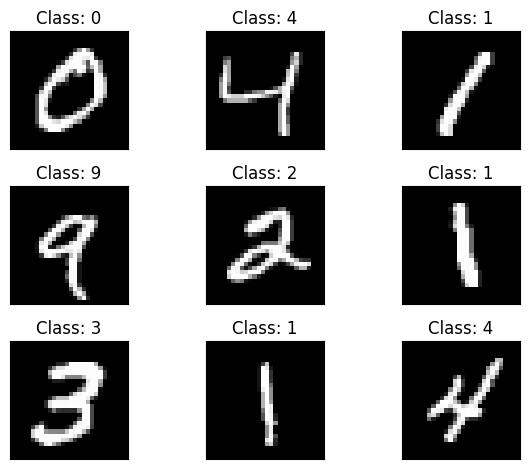

In [6]:
for i in range(1, 10):
    plt.subplot(3,3,i)
    plt.imshow(x_train[i], cmap='gray', interpolation='none')
    plt.xticks([])
    plt.yticks([])
    plt.title(f'Class: {y_train[i]}')

plt.tight_layout()
plt.show()

## 데이터 전처리

### Feature Scaling

- 0 ~ 1 사이로 Pixel 값을 Scaling

In [7]:
x_train[0][9]

array([  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253,
       205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0], dtype=uint8)

In [8]:
x_train_scaled = x_train / 255.
x_test_scaled = x_test / 255.

In [9]:
x_train_scaled[0][9]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.31372549, 0.61176471,
       0.41960784, 0.99215686, 0.99215686, 0.80392157, 0.04313725,
       0.        , 0.16862745, 0.60392157, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        ])

### Conv2D Layer 입력 요구 사항 : 3 차원

In [12]:
print([x.shape for x in [x_train_scaled, x_test_scaled]])

[(60000, 28, 28), (10000, 28, 28)]


In [17]:
x_train_scaled = np.expand_dims(x_train_scaled, axis=3)
x_test_scaled = np.expand_dims(x_test_scaled, axis=3)

In [18]:
print([x.shape for x in [x_train_scaled, x_test_scaled]])

[(60000, 28, 28, 1), (10000, 28, 28, 1)]


### Label 을 One-Hot Encoding

In [20]:
y_train_onehot = tf.keras.utils.to_categorical(y_train)
y_test_onehot = tf.keras.utils.to_categorical(y_test)

In [21]:
print([x.shape for x in [y_train, y_test, y_train_onehot, y_test_onehot]])

[(60000,), (10000,), (60000, 10), (10000, 10)]


### tf.data 를 이용한 Shuffling and Batch 구성

In [22]:
train_ds = tf.data.Dataset.from_tensor_slices((x_train_scaled, y_train_onehot)).shuffle(10000).batch(128)
test_ds = tf.data.Dataset.from_tensor_slices((x_test_scaled, y_test_onehot)).shuffle(10000).batch(128)

In [26]:
for X, Y in train_ds.take(1):
    print(X.shape)
    print(Y.shape)

(128, 28, 28, 1)
(128, 10)


## LeNet Model 구성

<img src="https://d2l.ai/_images/lenet.svg" width="800" />

### 모델링

In [30]:
model = tf.keras.models.Sequential()

# Convolutional Layer
model.add(tf.keras.layers.Conv2D(filters=6, kernel_size=5, padding='same', input_shape=(28,28,1)))
model.add(tf.keras.layers.Activation(activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)))

model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=5, padding='valid'))
model.add(tf.keras.layers.Activation(activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)))

# Fully Connected Layer
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=120))
model.add(tf.keras.layers.Activation(activation='relu'))

model.add(tf.keras.layers.Dense(units=84))
model.add(tf.keras.layers.Activation(activation='relu'))

model.add(tf.keras.layers.Dense(units=10))
model.add(tf.keras.layers.Activation(activation='softmax'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 6)         156       
                                                                 
 activation_15 (Activation)  (None, 28, 28, 6)         0         
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 14, 14, 6)         0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 activation_16 (Activation)  (None, 10, 10, 16)        0         
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 5, 5, 16)          0         
 g2D)                                                 

In [31]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

### 모델 학습

In [32]:
history = model.fit(train_ds, epochs=5, validation_data=test_ds)

Epoch 1/5
469/469 [==============================] - 15s 29ms/step - loss: 0.2631 - accuracy: 0.9237 - val_loss: 0.0801 - val_accuracy: 0.9744
Epoch 2/5
469/469 [==============================] - 14s 29ms/step - loss: 0.0740 - accuracy: 0.9772 - val_loss: 0.0631 - val_accuracy: 0.9797
Epoch 3/5
469/469 [==============================] - 14s 31ms/step - loss: 0.0555 - accuracy: 0.9832 - val_loss: 0.0447 - val_accuracy: 0.9837
Epoch 4/5
469/469 [==============================] - 16s 34ms/step - loss: 0.0437 - accuracy: 0.9867 - val_loss: 0.0393 - val_accuracy: 0.9864
Epoch 5/5
469/469 [==============================] - 17s 35ms/step - loss: 0.0372 - accuracy: 0.9883 - val_loss: 0.0476 - val_accuracy: 0.9844


### 모델 평가

In [33]:
model.metrics_names

['loss', 'accuracy']

In [34]:
scores = model.evaluate(test_ds)

79/79 [==============================] - 1s 11ms/step - loss: 0.0476 - accuracy: 0.9844


In [36]:
print(f'Model Loss:     {scores[0]:,.4f}')
print(f'Model Accuracy: {scores[1]:,.4f}')

Model Loss:     0.0476
Model Accuracy: 0.9844


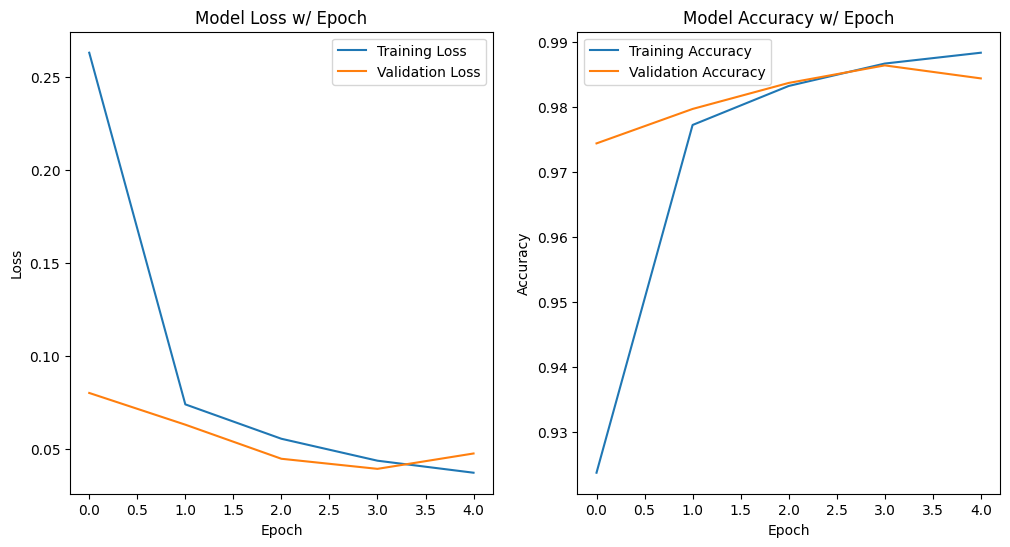

In [39]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss w/ Epoch')

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy w/ Epoch')

plt.show()

### 모델 예측

In [44]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [40]:
y_pred = model.predict(x_test_scaled).argmax(axis=1)

313/313 [==============================] - 2s 5ms/step


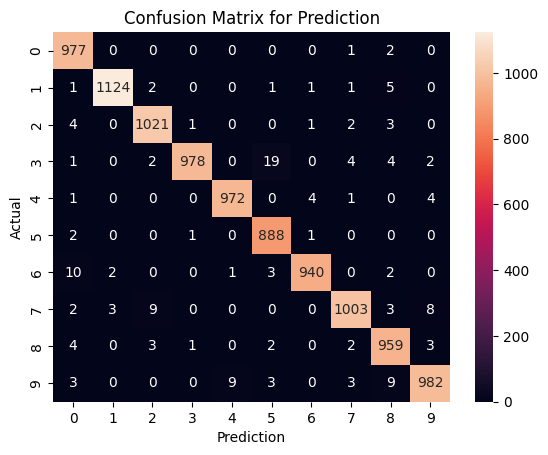

In [65]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Prediction')
plt.show()

In [43]:
cm

array([[ 977,    0,    0,    0,    0,    0,    0,    1,    2,    0],
       [   1, 1124,    2,    0,    0,    1,    1,    1,    5,    0],
       [   4,    0, 1021,    1,    0,    0,    1,    2,    3,    0],
       [   1,    0,    2,  978,    0,   19,    0,    4,    4,    2],
       [   1,    0,    0,    0,  972,    0,    4,    1,    0,    4],
       [   2,    0,    0,    1,    0,  888,    1,    0,    0,    0],
       [  10,    2,    0,    0,    1,    3,  940,    0,    2,    0],
       [   2,    3,    9,    0,    0,    0,    0, 1003,    3,    8],
       [   4,    0,    3,    1,    0,    2,    0,    2,  959,    3],
       [   3,    0,    0,    0,    9,    3,    0,    3,    9,  982]],
      dtype=int64)

In [59]:
print(f'Accuracy  Score: {accuracy_score(y_test, y_pred):,.4f}')
print(f'Precision Score: {precision_score(y_test, y_pred, average="macro"):,.4f}')
print(f'Recall    Score: {recall_score(y_test, y_pred, average="macro"):,.4f}')
print(f'F1        Score: {f1_score(y_test, y_pred, average="macro"):,.4f}')

Accuracy  Score: 0.9844
Precision Score: 0.9842
Recall    Score: 0.9845
F1        Score: 0.9843


# 실습 : fashion MNIST 를 이용하여 위와 동일한 작업

## 필요 라이브러리 로드

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [2]:
tf.__version__

'2.13.0'

In [3]:
import ssl

ssl._create_default_https_context = ssl._create_unverified_context

## 데이터 로드 및 Train, Test 분할

In [4]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [5]:
print([x.shape for x in [x_train, y_train, x_test, y_test]])

[(60000, 28, 28), (60000,), (10000, 28, 28), (10000,)]


In [6]:
class_names = [ 'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot' ]

## EDA 및 데이터 시각화

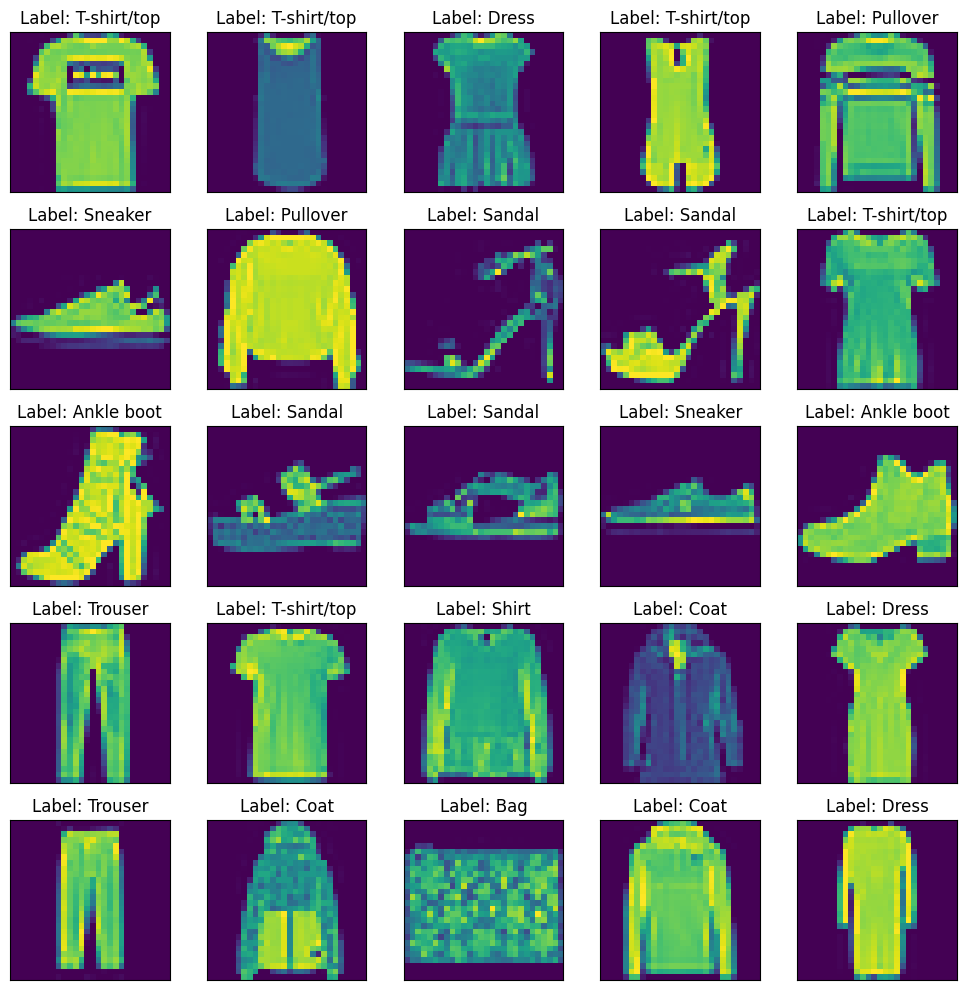

In [13]:
plt.figure(figsize=(10, 10))

for i in range(1, 26):
    plt.subplot(5,5,i)
    plt.imshow(x_train[i])
    plt.xticks([])
    plt.yticks([])
    plt.title(f'Label: {class_names[y_train[i]]}')

plt.tight_layout()
plt.show()

## 데이터 전처리

### Feature Scaling

In [14]:
x_train[0][9]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
       183, 225, 216, 223, 228, 235, 227, 224, 222, 224, 221, 223, 245,
       173,   0], dtype=uint8)

In [15]:
x_train_scaled = x_train / 255.0
x_test_scaled = x_test / 255.0

In [16]:
x_train_scaled[0][9]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.71764706, 0.88235294,
       0.84705882, 0.8745098 , 0.89411765, 0.92156863, 0.89019608,
       0.87843137, 0.87058824, 0.87843137, 0.86666667, 0.8745098 ,
       0.96078431, 0.67843137, 0.        ])

### Conv2D Layer 입력 사양에 맞추어 3 dimension 으로 차원 증가

In [17]:
print([x.shape for x in [x_train_scaled, x_test_scaled]])

[(60000, 28, 28), (10000, 28, 28)]


In [18]:
x_train_scaled = np.expand_dims(x_train_scaled, axis=3)
x_test_scaled = np.expand_dims(x_test_scaled, axis=3)

In [19]:
print([x.shape for x in [x_train_scaled, x_test_scaled]])

[(60000, 28, 28, 1), (10000, 28, 28, 1)]


### Label 을 one-hot-encoding

In [20]:
print([x.shape for x in [y_train, y_test]])

[(60000,), (10000,)]


In [21]:
y_train_onehot = tf.keras.utils.to_categorical(y_train)
y_test_onehot = tf.keras.utils.to_categorical(y_test)

In [22]:
print([x.shape for x in [y_train_onehot, y_test_onehot]])

[(60000, 10), (10000, 10)]


### tf.data 를 이용한 Shuffling and Batch 구성

In [23]:
train_ds = tf.data.Dataset.from_tensor_slices((x_train_scaled, y_train_onehot)).shuffle(10000).batch(128)
test_ds = tf.data.Dataset.from_tensor_slices((x_test_scaled, y_test_onehot)).shuffle(10000).batch(128)

In [24]:
for X, Y in train_ds.take(1):
    print(X.shape)
    print(Y.shape)

(128, 28, 28, 1)
(128, 10)


## 모델링

### LeNet Model 구성

In [38]:
model1 = tf.keras.models.Sequential()

# Convolutional Layer
model1.add(tf.keras.layers.Conv2D(filters=6, kernel_size=5, padding='same', input_shape=(28,28,1), activation='relu'))
model1.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)))

model1.add(tf.keras.layers.Conv2D(filters=16, kernel_size=5, padding='valid', activation='relu'))
model1.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)))

# Fully Connected Layer
model1.add(tf.keras.layers.Flatten())
model1.add(tf.keras.layers.Dense(units=120, activation='relu'))
model1.add(tf.keras.layers.Dense(units=84, activation='relu'))
model1.add(tf.keras.layers.Dense(units=10, activation='softmax'))
model1.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 28, 28, 6)         156       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 14, 14, 6)         0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 5, 5, 16)          0         
 g2D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 400)               0         
                                                                 
 dense_12 (Dense)            (None, 120)              

In [39]:
model2 = tf.keras.models.Sequential()

# Convolutional Layer
model2.add(tf.keras.layers.Conv2D(filters=6, kernel_size=5, padding='same', input_shape=(28,28,1)))
model2.add(tf.keras.layers.Activation(activation='relu'))
model2.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)))

model2.add(tf.keras.layers.Conv2D(filters=16, kernel_size=5, padding='valid'))
model2.add(tf.keras.layers.Activation(activation='relu'))
model2.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)))

# Fully Connected Layer
model2.add(tf.keras.layers.Flatten())
model2.add(tf.keras.layers.Dense(units=120))
model2.add(tf.keras.layers.Activation(activation='relu'))
model2.add(tf.keras.layers.Dense(units=84))
model2.add(tf.keras.layers.Activation(activation='relu'))
model2.add(tf.keras.layers.Dense(units=10))
model2.add(tf.keras.layers.Activation(activation='softmax'))
model2.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 28, 28, 6)         156       
                                                                 
 activation (Activation)     (None, 28, 28, 6)         0         
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 14, 14, 6)         0         
 ng2D)                                                           
                                                                 
 conv2d_12 (Conv2D)          (None, 10, 10, 16)        2416      
                                                                 
 activation_1 (Activation)   (None, 10, 10, 16)        0         
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 5, 5, 16)          0         
 ng2D)                                                

In [40]:
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [41]:
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

### 모델 학습

In [42]:
history1 = model1.fit(train_ds, epochs=5, validation_data=test_ds)

Epoch 1/5
469/469 [==============================] - 15s 31ms/step - loss: 0.6616 - accuracy: 0.7623 - val_loss: 0.4958 - val_accuracy: 0.8273
Epoch 2/5
469/469 [==============================] - 15s 31ms/step - loss: 0.4192 - accuracy: 0.8500 - val_loss: 0.4139 - val_accuracy: 0.8517
Epoch 3/5
469/469 [==============================] - 15s 31ms/step - loss: 0.3661 - accuracy: 0.8683 - val_loss: 0.3721 - val_accuracy: 0.8670
Epoch 4/5
469/469 [==============================] - 17s 35ms/step - loss: 0.3337 - accuracy: 0.8796 - val_loss: 0.3468 - val_accuracy: 0.8710
Epoch 5/5
469/469 [==============================] - 17s 36ms/step - loss: 0.3153 - accuracy: 0.8853 - val_loss: 0.3494 - val_accuracy: 0.8685


In [43]:
history2 = model2.fit(train_ds, epochs=5, validation_data=test_ds)

Epoch 1/5
469/469 [==============================] - 17s 35ms/step - loss: 0.6462 - accuracy: 0.7653 - val_loss: 0.4622 - val_accuracy: 0.8359
Epoch 2/5
469/469 [==============================] - 17s 35ms/step - loss: 0.4129 - accuracy: 0.8514 - val_loss: 0.3873 - val_accuracy: 0.8626
Epoch 3/5
469/469 [==============================] - 16s 35ms/step - loss: 0.3579 - accuracy: 0.8707 - val_loss: 0.3934 - val_accuracy: 0.8515
Epoch 4/5
469/469 [==============================] - 17s 35ms/step - loss: 0.3251 - accuracy: 0.8818 - val_loss: 0.3397 - val_accuracy: 0.8798
Epoch 5/5
469/469 [==============================] - 17s 36ms/step - loss: 0.3010 - accuracy: 0.8906 - val_loss: 0.3410 - val_accuracy: 0.8752


### 모델 평가

In [44]:
model1.metrics_names, model2.metrics_names

(['loss', 'accuracy'], ['loss', 'accuracy'])

In [45]:
scores1 = model1.evaluate(test_ds)

79/79 [==============================] - 1s 10ms/step - loss: 0.3494 - accuracy: 0.8685


In [46]:
scores2 = model2.evaluate(test_ds)

79/79 [==============================] - 1s 10ms/step - loss: 0.3410 - accuracy: 0.8752


In [47]:
print(f'Model 1 Loss=     {scores1[0]:,.4f}')
print(f'Model 1 Accuracy= {scores1[1]:,.4f}')

Model 1 Loss=     0.3494
Model 1 Accuracy= 0.8685


In [48]:
print(f'Model 2 Loss=     {scores2[0]:,.4f}')
print(f'Model 2 Accuracy= {scores2[1]:,.4f}')

Model 2 Loss=     0.3410
Model 2 Accuracy= 0.8752


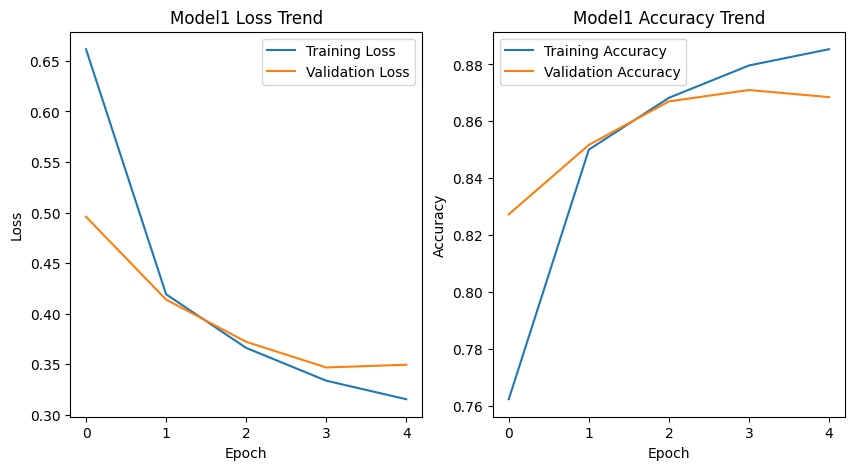

In [53]:
plt.figure(figsize=(10, 5))

plt.subplot(1,2,1)
plt.plot(history1.history['loss'], label='Training Loss')
plt.plot(history1.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Model1 Loss Trend')

plt.subplot(1,2,2)
plt.plot(history1.history['accuracy'], label='Training Accuracy')
plt.plot(history1.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model1 Accuracy Trend')

plt.show()

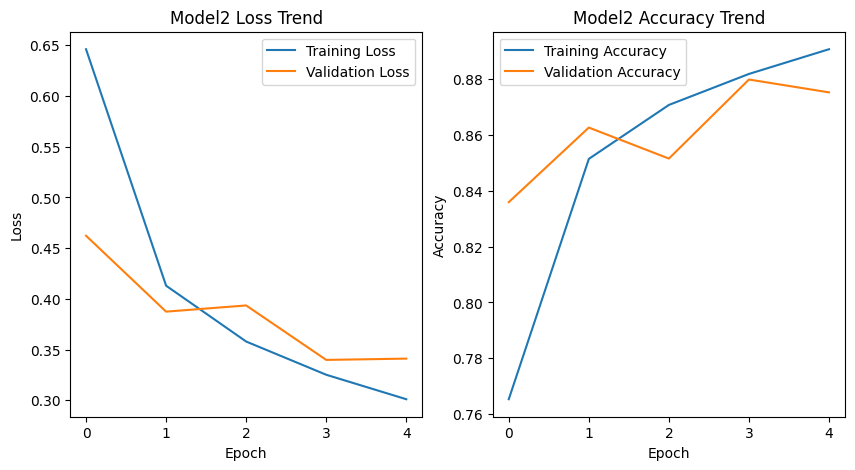

In [52]:
plt.figure(figsize=(10, 5))

plt.subplot(1,2,1)
plt.plot(history2.history['loss'], label='Training Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Model2 Loss Trend')

plt.subplot(1,2,2)
plt.plot(history2.history['accuracy'], label='Training Accuracy')
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model2 Accuracy Trend')

plt.show()

### 모델 예측

In [55]:
y_pred = model1.predict(x_test_scaled).argmax(axis=1)

313/313 [==============================] - 2s 5ms/step


### 모델 예측 평가

In [56]:
cm = confusion_matrix(y_test, y_pred)

In [57]:
cm

array([[632,   0,  25,  48,   9,   1, 273,   0,  11,   1],
       [  0, 960,   0,  26,   5,   1,   6,   0,   2,   0],
       [  9,   1, 813,  10, 109,   0,  56,   0,   2,   0],
       [  9,   3,  11, 905,  33,   0,  34,   0,   4,   1],
       [  1,   0,  50,  36, 863,   0,  49,   0,   1,   0],
       [  0,   0,   0,   0,   0, 954,   0,  33,   1,  12],
       [ 48,   2,  92,  37, 119,   0, 689,   0,  13,   0],
       [  0,   0,   0,   0,   0,   8,   0, 983,   1,   8],
       [  0,   2,  11,   7,   4,   1,   4,   4, 967,   0],
       [  0,   0,   0,   0,   0,   5,   1,  75,   0, 919]], dtype=int64)

In [60]:
print(f'Accuracy  Score= {accuracy_score(y_test, y_pred):,.4f}')
print(f'Precision Score= {precision_score(y_test, y_pred, average="macro"):,.4f}')
print(f'Recall    Score= {recall_score(y_test, y_pred, average="macro"):,.4f}')
print(f'F1        Score= {f1_score(y_test, y_pred, average="macro"):,.4f}')

Accuracy  Score= 0.8685
Precision Score= 0.8752
Recall    Score= 0.8685
F1        Score= 0.8685


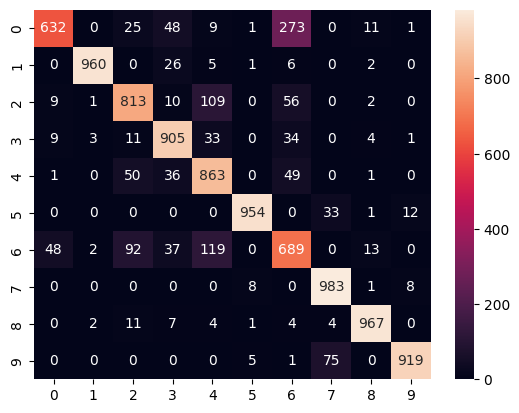

In [61]:
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

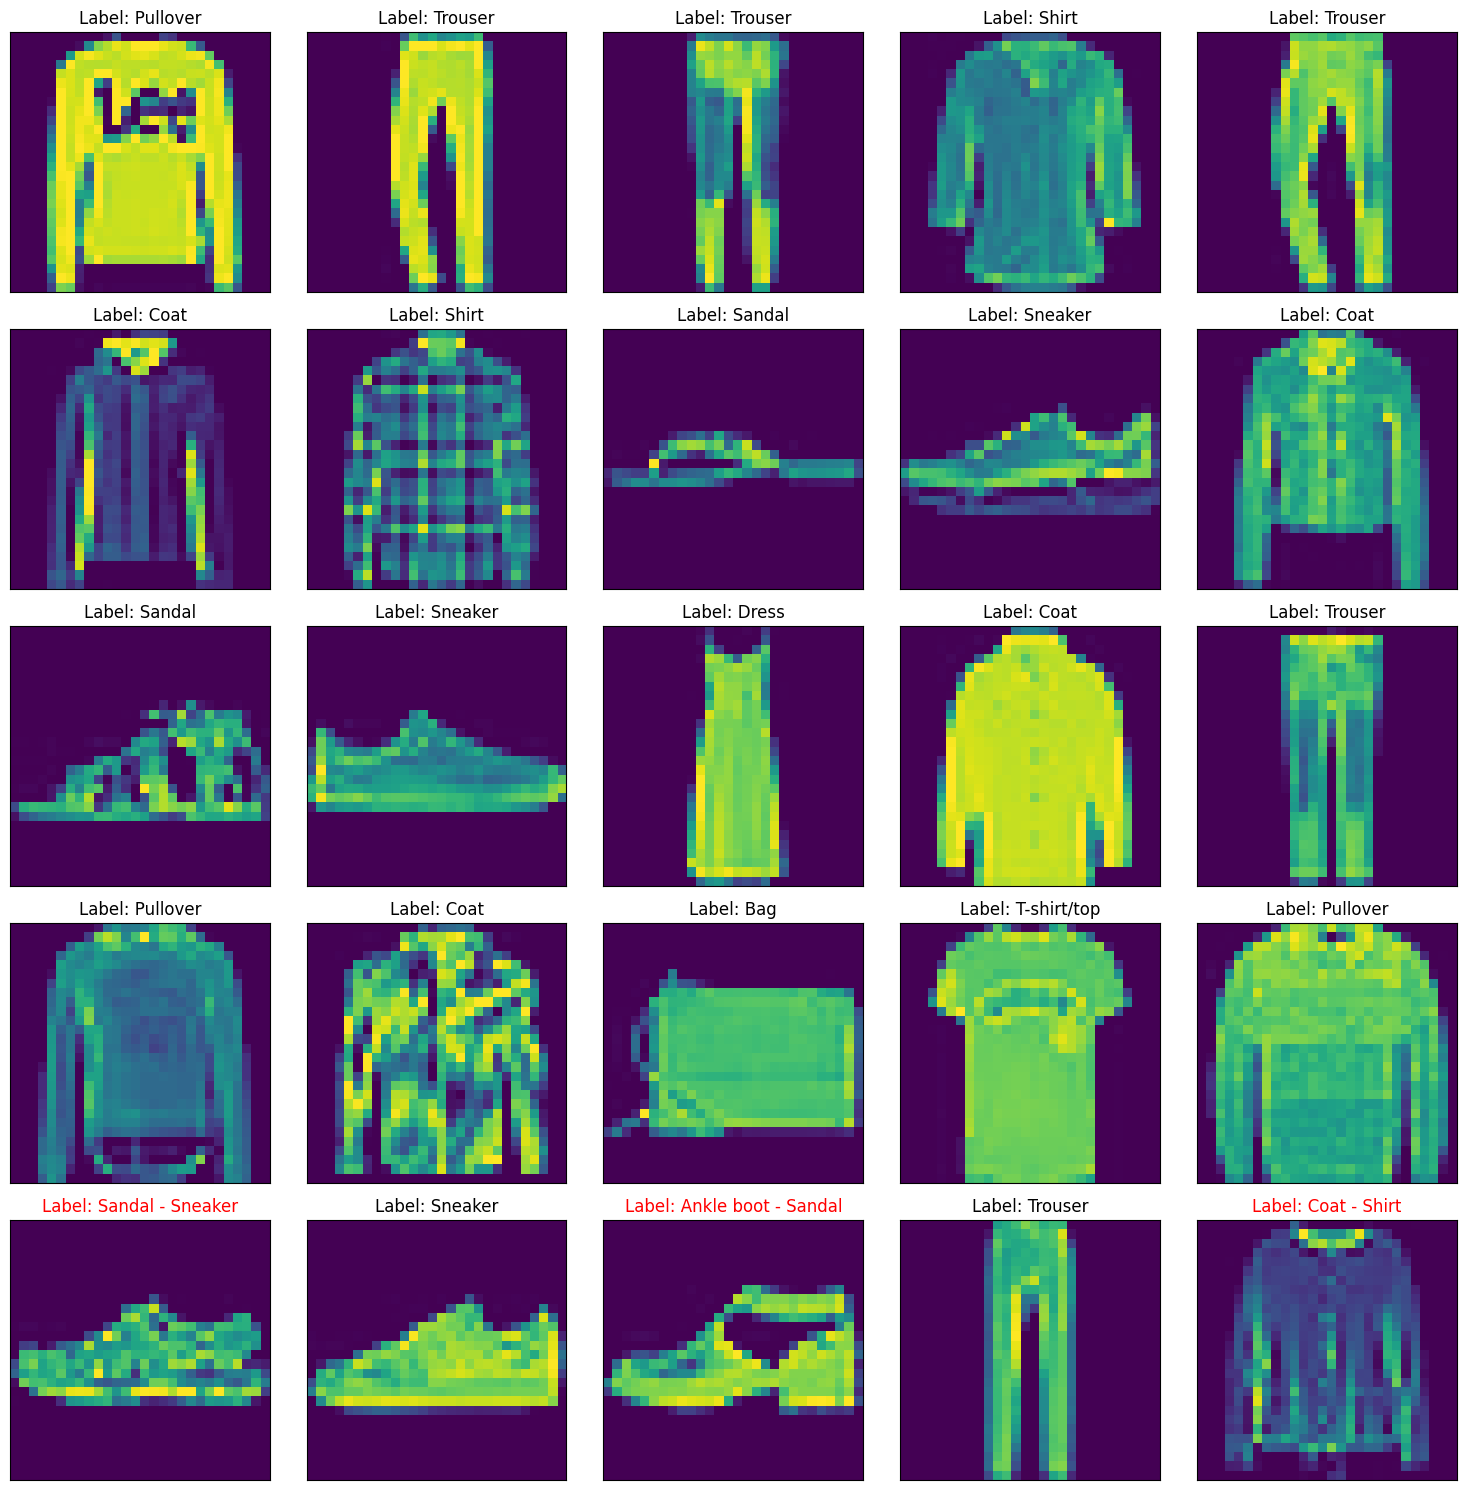

In [62]:
plt.figure(figsize=(15, 15))

for i in range(1, 26):
    plt.subplot(5,5,i)
    plt.imshow(x_test[i])
    plt.xticks([])
    plt.yticks([])
    if y_test[i] == y_pred[i]:
        plt.title(f'Label: {class_names[y_pred[i]]}')
    else:
        plt.title(f'Label: {class_names[y_test[i]]} - {class_names[y_pred[i]]}', color='red')

plt.tight_layout()
plt.show()

In [63]:
correctness = np.nonzero(y_test == y_pred)[0]
incorrectness = np.nonzero(y_test != y_pred)[0]

In [65]:
correctness.shape, incorrectness.shape

((8685,), (1315,))